In [ ]:
# Get data:


__Have to run this at the start of the notebook to reload changes to libraries and reload charts or images that are displayed__

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *
from fastai.metrics import error_rate

---
### Set the Batch Size for the Rest of the Project
---

In [65]:
bs = 64
fifty_bs = bs // 2

---
### Unzip the data from the file (run once)
---

In [4]:
import zipfile
import os

folder = 'lesson-1-xray-data'

fp = os.path.join(folder, 'chest-xray-pneumonia.zip')

with zipfile.ZipFile(fp, 'r') as z:
    z.extractall(folder)

In [12]:
unzipped_folder = os.path.join(folder, 'chest_xray')
os.listdir(unzipped_folder)

['__MACOSX', 'val', 'chest_xray', 'train', 'test']

---
### Explore different ways to get an ImageDataBunch
---

In [22]:
doc(ImageDataBunch)

In [24]:
doc(get_transforms)

#### Here's the docs for the one we want
from_folder[source][test]
from_folder(path:PathOrStr, train:PathOrStr='train', valid:PathOrStr='valid', test:Union[Path, str, NoneType]=None, valid_pct=None, seed:int=None, classes:Collection[T_co]=None, **kwargs:Any) → ImageDataBunch

Create from imagenet style dataset in path with train,valid,test subfolders (or provide valid_pct).

Refer to create_from_ll to see all the **kwargs arguments.

"Imagenet-style" datasets look something like this (note that the test folder is optional):

path\
  train\
    clas1\
    clas2\
    ...
  valid\
    clas1\
    clas2\
    ...
  test\
For example:

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)
Note that this (and all factory methods in this section) pass any kwargs to DataBunch.create.

__from_folder factory looks pretty good since we have an ImageNet style dataset__

In [14]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', test: Union[pathlib.Path, str, NoneType] = None, valid_pct=None, seed: int = None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



---
### Get ImageDataBunch
---

In [16]:
print(os.path.join(unzipped_folder, 'chest_xray'))

lesson-1-xray-data/chest_xray/chest_xray


In [26]:
print(imagenet_stats)

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])


In [27]:
help(ImageDataBunch.normalize)

Help on function normalize in module fastai.vision.data:

normalize(self, stats: Collection[torch.Tensor] = None, do_x: bool = True, do_y: bool = False) -> None
    Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)



In [58]:
# test get_transforms vs not get_transforms (adds variation to the data set)
# find out what normalize does
data = ImageDataBunch.from_folder(
    path=os.path.join(unzipped_folder, 'chest_xray'),
    valid='test',
    size=224,
    bs=bs,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

In [66]:
fifty_data = ImageDataBunch.from_folder(
    path=os.path.join(unzipped_folder, 'chest_xray'),
    valid='test',
    size=224,
    bs=bs // 2,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

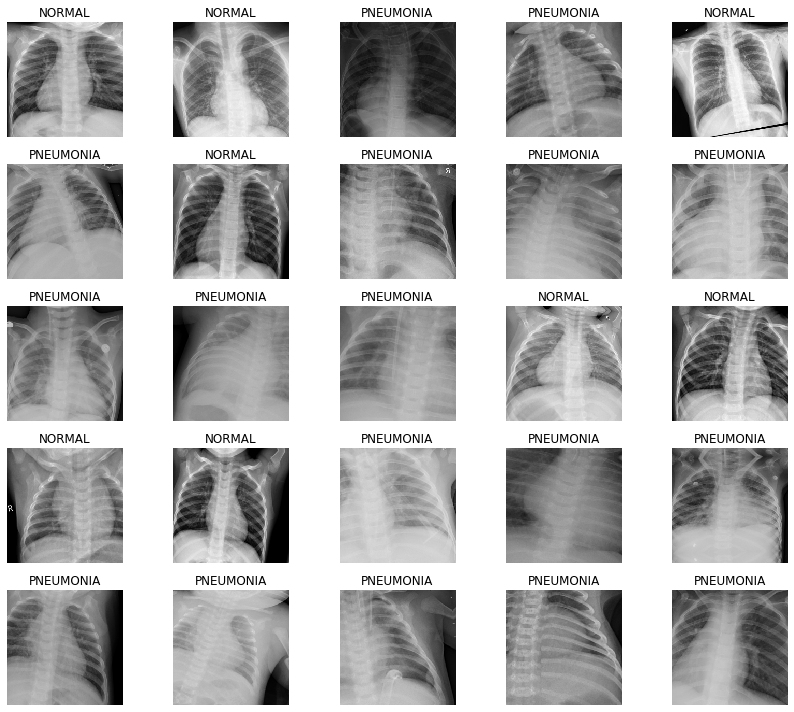

In [59]:
data.show_batch(rows=5, figsize=(12,10))

In [60]:
print(data.classes)
data.c

['NORMAL', 'PNEUMONIA']


2

---
### Make the Model and train it
---

In [68]:
learn = cnn_learner(fifty_data, models.resnet50, metrics=error_rate)

In [69]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.313337,0.533711,0.142628,01:03
1,0.205268,0.466205,0.153846,01:04
2,0.142045,0.389037,0.133013,01:04
3,0.121799,0.302620,0.105769,01:04


In [70]:
learn.save('stage-1-50')

In [72]:
interp = ClassificationInterpretation.from_learner(learn)

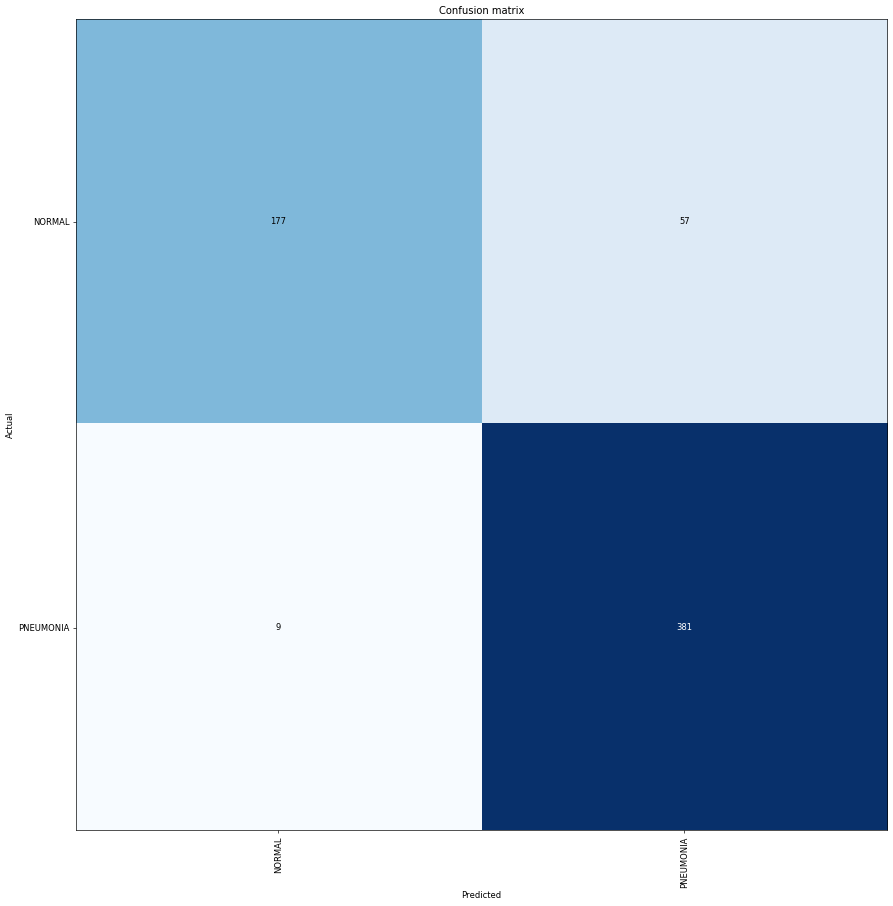

In [73]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [74]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


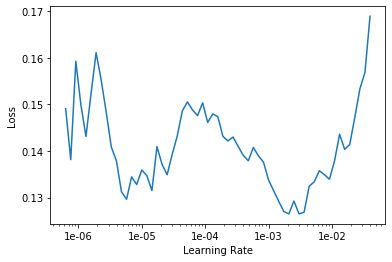

In [75]:
learn.recorder.plot()

In [76]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.336953,2.135783,0.410256,01:03
1,0.176389,0.337019,0.110577,01:02


In [77]:
learn.freeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.151314,0.372172,0.125000,01:01
1,0.133391,0.325005,0.102564,01:01


In [78]:
learn.save('stage-2-50')

---
### Test with like 50 epochs and train for an hour...
---

In [80]:
learn = cnn_learner(fifty_data, models.resnet50, metrics=error_rate)

In [81]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,error_rate,time
0,0.429199,0.470065,0.131410,01:01
1,0.306973,0.422347,0.128205,01:00
2,0.260676,0.473312,0.125000,01:00
3,0.225085,0.477564,0.134615,01:00
4,0.213182,0.406981,0.129808,01:00
5,0.147147,0.352435,0.105769,00:59
6,0.147449,0.410192,0.128205,01:00
7,0.157587,0.468100,0.150641,00:59
8,0.123463,0.338991,0.115385,00:59
9,0.113940,0.489455,0.142628,00:59
